# Modelos de Regressão

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error


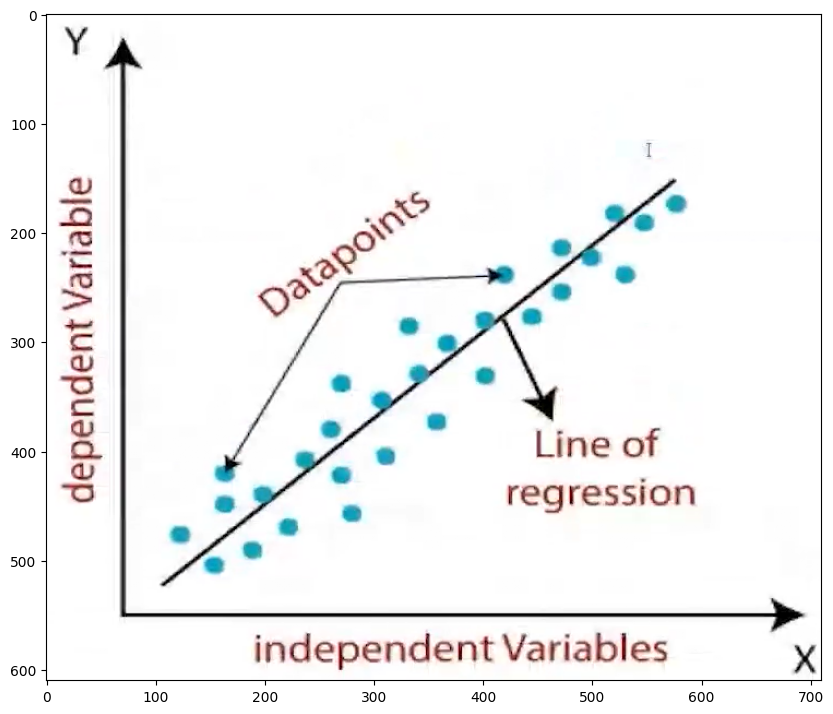

In [2]:
im = plt.imread('reg01.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df = df[['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront']]


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0


In [7]:
colunas_para_remover = ['id', 'date']
df = df.drop(colunas_para_remover, axis=1)


In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
0,221900.0,3,1.00,1180,5650,1.0,0
1,538000.0,3,2.25,2570,7242,2.0,0
2,180000.0,2,1.00,770,10000,1.0,0
3,604000.0,4,3.00,1960,5000,1.0,0
4,510000.0,3,2.00,1680,8080,1.0,0


In [9]:
rows, cols = df.shape

print(f'Linhas: {rows}. Colunas: {cols}')


Linhas: 21613. Colunas: 7


In [10]:
x = df.drop('price', axis=1)
y = df['price']


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)


In [12]:
x

array([[-0.39873715, -1.44746357, -0.97983502, -0.22832133, -0.915427  ,
        -0.08717263],
       [-0.39873715,  0.1756067 ,  0.53363434, -0.18988538,  0.93650577,
        -0.08717263],
       [-1.47395936, -1.44746357, -1.42625404, -0.12329847, -0.915427  ,
        -0.08717263],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, -0.33213703,  0.93650577,
        -0.08717263],
       [-0.39873715,  0.50022075, -0.52252773, -0.30707641,  0.93650577,
        -0.08717263],
       [-1.47395936, -1.77207762, -1.15404732, -0.33875227,  0.93650577,
        -0.08717263]])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)


In [15]:
print(f'Exemplos para o treinamento: {len(y_train)}. E para o teste: {len(y_test)}')


Exemplos para o treinamento: 15129. E para o teste: 6484


# Regressão Linear

##### A regressão linear se baseia na seguinte equação: y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε


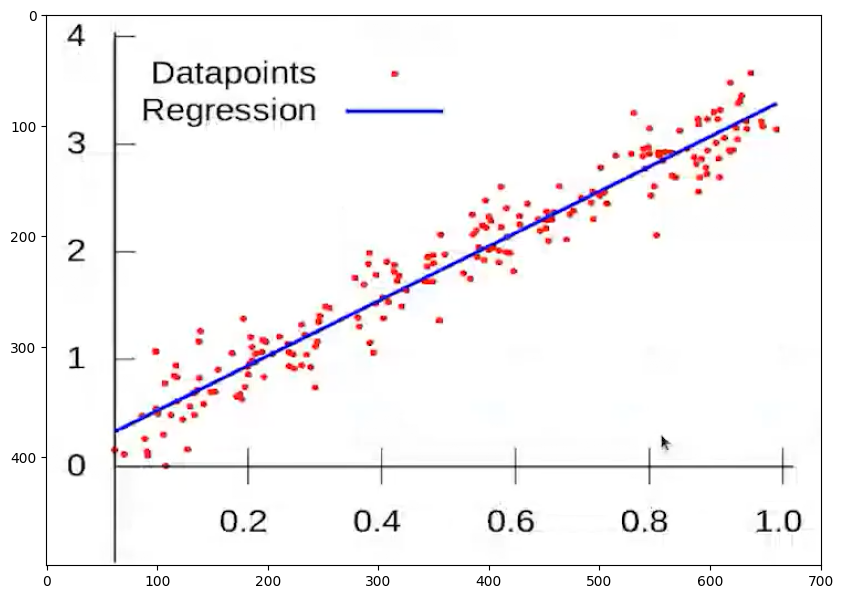

In [16]:
# https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear
im = plt.imread('reg2.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


In [19]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


In [24]:
mse = mean_squared_error(y_test, y_pred, squared=True)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')


MSE: 59720319004.31743
RMSE: 244377.4109943827
MAPE: 0.34372110052284877


C:\Users\vinic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# K-NN Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
#k=7
model = KNeighborsRegressor(n_neighbors=7, metric='euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [28]:
mape = mean_absolute_percentage_error(y_test, y_pred)


In [27]:
mape

np.float64(0.34372110052284877)

In [31]:
#k=11
model = KNeighborsRegressor(n_neighbors=11, metric='euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

np.float64(0.3173222072228688)

# Support Vector Machines para Regressão

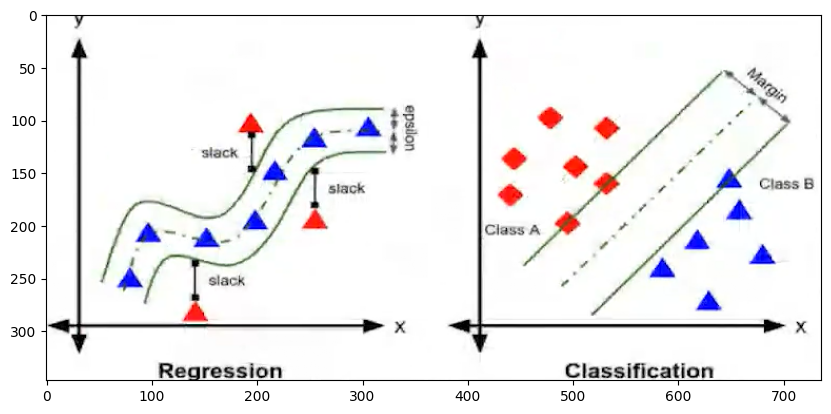

In [33]:
# https://medium.com/it-paragon/support-vector-machine-regression-cf65348b6345
im = plt.imread('reg3.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


In [34]:
from sklearn.svm import SVR 

In [35]:
model = SVR()
model.fit(x_train, y_train)

SVR()

In [36]:
y_pred = model.predict(x_test)

In [37]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

np.float64(0.42394906298998647)

In [38]:
model = SVR(kernel='linear', C=100)
model.fit(x_train, y_train)


SVR(C=100, kernel='linear')

In [40]:
y_pred = model.predict(x_test)


In [41]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

np.float64(0.32303828757937053)

# Árvore de Regressão

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)


DecisionTreeRegressor()

In [44]:
y_pred = model.predict(x_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
mape


np.float64(0.4059028630573969)

# XGboost

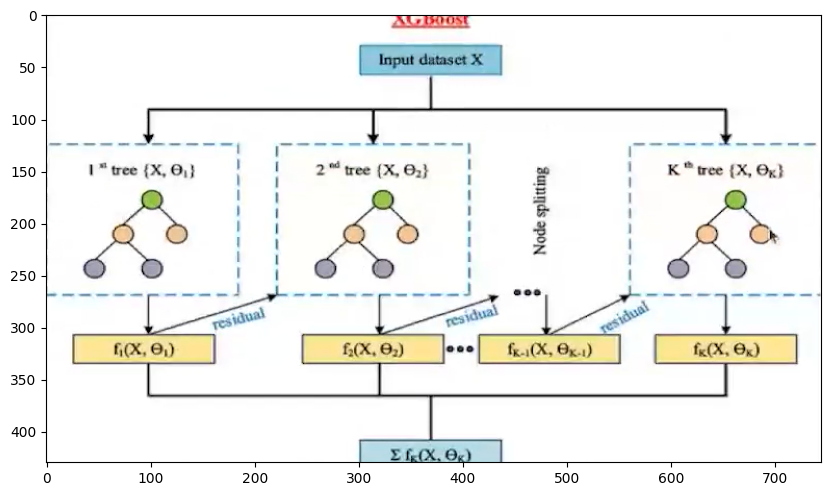

In [45]:
# https://www.researchgate.net/figure/The-XGBoost-algorithm-structure_fig4_378851394
im = plt.imread('reg4.png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.show()


In [46]:
from xgboost import XGBRegressor

In [47]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
y_pred = model.predict(x_test)



In [49]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

np.float64(0.3097471515447629)

In [50]:
params = {
    "n_estimators": 100,
    "max_depth": 6,
    "learning_rate": 0.1
}


In [51]:
model = XGBRegressor(**params)

In [52]:
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred = model.predict(x_test)

In [54]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

np.float64(0.3068973048652607)